# Eye Detection Dataset Visualization

This notebook demonstrates how to visualize eye detection data by drawing bounding box rectangles on images.

## Import Required Libraries

First, let's import all the necessary libraries for image processing and visualization.

In [22]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

print("All libraries imported successfully!")

All libraries imported successfully!


## Load and Prepare Image Data

Let's load the CSV file containing image annotations and check which image files exist in our dataset.

In [23]:
# Load the CSV file with annotations
df = pd.read_csv("dataset/data.csv")
print(f"CSV contains {len(df)} entries")
print("First few rows:")
print(df.head())

# Check which image files exist
image_paths = ["photos/" + name for name in df["filename"]]
existing_files = [path for path in image_paths if os.path.exists(path)]
missing_files = [path for path in image_paths if not os.path.exists(path)]

print(f"\nFound {len(existing_files)} existing image files")
if missing_files:
    print(f"Missing {len(missing_files)} files: {missing_files[:5]}")

# Display some sample data
print("\nSample annotations:")
for i in range(min(3, len(df))):
    row = df.iloc[i]
    print(f"Image: {row['filename']}")
    print(f"  Left eye (x,y,w,h): ({row['lx']}, {row['ly']}, {row['lw']}, {row['lh']})")
    print(f"  Right eye (x,y,w,h): ({row['rx']}, {row['ry']}, {row['rw']}, {row['rh']})")
    print()

CSV contains 8 entries
First few rows:
  filename  lx  ly  lw  lh  rx  ry  rw  rh
0  1/0.png  23  49  22  11  64  48  19  12
1  1/1.png  25  49  20  10  64  45  19  12
2  1/2.png  27  49  18  10  64  48  18  12
3  1/3.png  23  49  22  10  64  48  19  12
4  2/0.png  25  44  24  14  64  44  16  15

Found 8 existing image files

Sample annotations:
Image: 1/0.png
  Left eye (x,y,w,h): (23, 49, 22, 11)
  Right eye (x,y,w,h): (64, 48, 19, 12)

Image: 1/1.png
  Left eye (x,y,w,h): (25, 49, 20, 10)
  Right eye (x,y,w,h): (64, 45, 19, 12)

Image: 1/2.png
  Left eye (x,y,w,h): (27, 49, 18, 10)
  Right eye (x,y,w,h): (64, 48, 18, 12)



## Process Image for Display

Now let's load and process an image for visualization. We'll use TensorFlow to load, decode, and resize the image.

In [24]:
# Select the first available image for testing
if existing_files:
    test_image_path = existing_files[0]
    print(f"Processing image: {test_image_path}")
    
    # Load and decode the image
    image_raw = tf.io.read_file(test_image_path)
    
    # Decode PNG or JPEG based on file extension
    if test_image_path.endswith('.png'):
        image = tf.image.decode_png(image_raw, channels=3)
    else:
        image = tf.image.decode_jpeg(image_raw, channels=3)
    
    print(f"Original image shape: {image.shape}")
    
    # Store original dimensions for coordinate scaling
    original_height, original_width = image.shape[:2]
    
    # Resize image to standard size for better visualization
    display_size = 400  # Larger size for better visibility
    image_resized = tf.image.resize(image, [display_size, display_size])
    image_normalized = tf.cast(image_resized, tf.float32) / 255.0
    
    print(f"Processed image shape: {image_normalized.shape}")
    print(f"Image value range: {tf.reduce_min(image_normalized):.3f} to {tf.reduce_max(image_normalized):.3f}")
else:
    print("No image files found!")

Processing image: photos/1/0.png
Original image shape: (112, 112, 3)
Processed image shape: (400, 400, 3)
Image value range: 0.017 to 0.803


## Extract Bounding Box Coordinates

Extract the eye bounding box coordinates from the CSV data and scale them to match our display image size.

In [25]:
# Get the corresponding row from CSV data
idx = image_paths.index(test_image_path)
row = df.iloc[idx]

# Extract original coordinates
original_coords = row[["lx", "ly", "lw", "lh", "rx", "ry", "rw", "rh"]].values
print(f"Original coordinates: {original_coords}")

# Scale coordinates to match display image size
scale_x = display_size / original_width
scale_y = display_size / original_height

# Scale the coordinates
left_eye = {
    'x': original_coords[0] * scale_x,
    'y': original_coords[1] * scale_y,
    'width': original_coords[2] * scale_x,
    'height': original_coords[3] * scale_y
}

right_eye = {
    'x': original_coords[4] * scale_x,
    'y': original_coords[5] * scale_y,
    'width': original_coords[6] * scale_x,
    'height': original_coords[7] * scale_y
}

print(f"Scaled left eye (x,y,w,h): ({left_eye['x']:.1f}, {left_eye['y']:.1f}, {left_eye['width']:.1f}, {left_eye['height']:.1f})")
print(f"Scaled right eye (x,y,w,h): ({right_eye['x']:.1f}, {right_eye['y']:.1f}, {right_eye['width']:.1f}, {right_eye['height']:.1f})")

Original coordinates: [np.int64(23) np.int64(49) np.int64(22) np.int64(11) np.int64(64)
 np.int64(48) np.int64(19) np.int64(12)]
Scaled left eye (x,y,w,h): (82.1, 175.0, 78.6, 39.3)
Scaled right eye (x,y,w,h): (228.6, 171.4, 67.9, 42.9)


## Draw Rectangles on Image

Now we'll use matplotlib to create Rectangle patches and draw them on the image to visualize the eye locations.

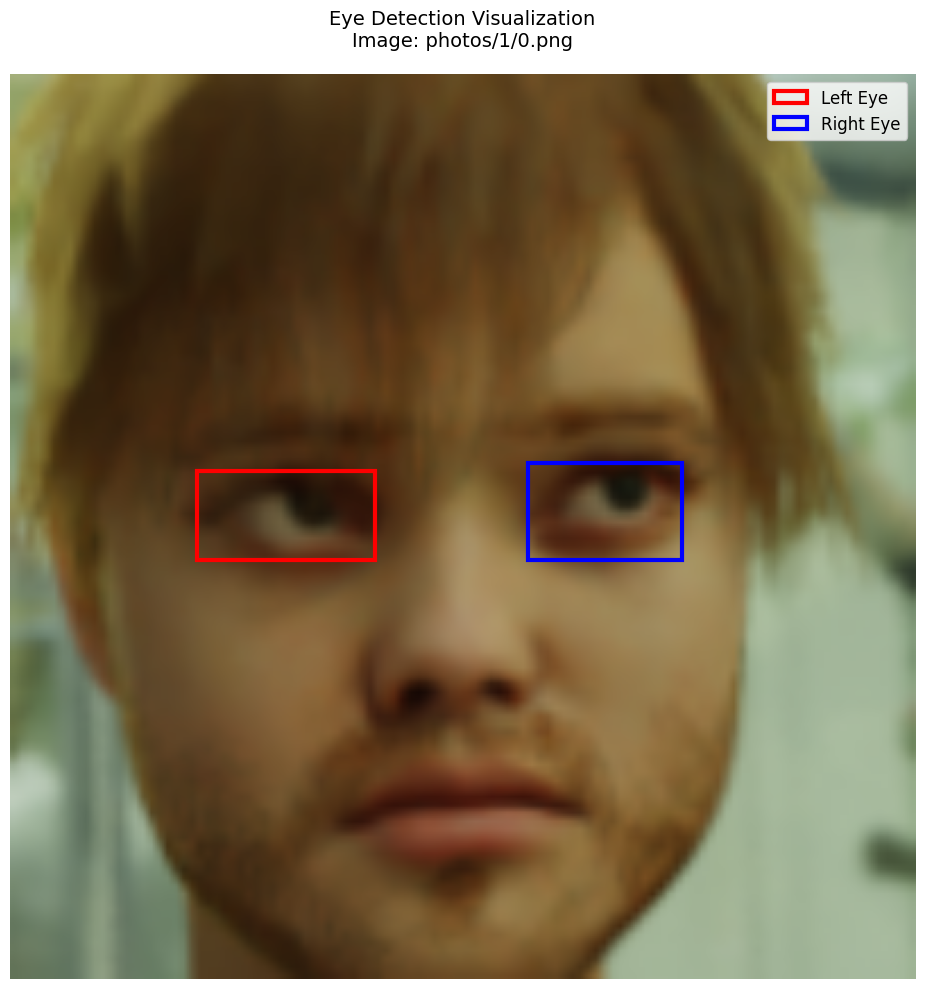

✅ Image visualization with bounding boxes completed!


In [26]:
# Create the plot
plt.figure(figsize=(12, 10))
plt.imshow(image_normalized.numpy())
plt.title(f"Eye Detection Visualization\nImage: {test_image_path}", fontsize=14, pad=20)

# Create rectangles for left and right eyes
# Left eye rectangle (red)
left_rect = plt.Rectangle(
    (left_eye['x'], left_eye['y']), 
    left_eye['width'], 
    left_eye['height'],
    edgecolor='red', 
    facecolor='none', 
    linewidth=3, 
    label='Left Eye'
)

# Right eye rectangle (blue)
right_rect = plt.Rectangle(
    (right_eye['x'], right_eye['y']), 
    right_eye['width'], 
    right_eye['height'],
    edgecolor='blue', 
    facecolor='none', 
    linewidth=3, 
    label='Right Eye'
)

# Add rectangles to the plot
plt.gca().add_patch(left_rect)
plt.gca().add_patch(right_rect)

# Add legend and formatting
plt.legend(loc='upper right', fontsize=12)
plt.axis('off')
plt.tight_layout()

# Show the plot
plt.show()

print("✅ Image visualization with bounding boxes completed!")

## Display Multiple Images (Bonus)

Let's create a function to visualize multiple images from our dataset to see how the annotations look across different samples.

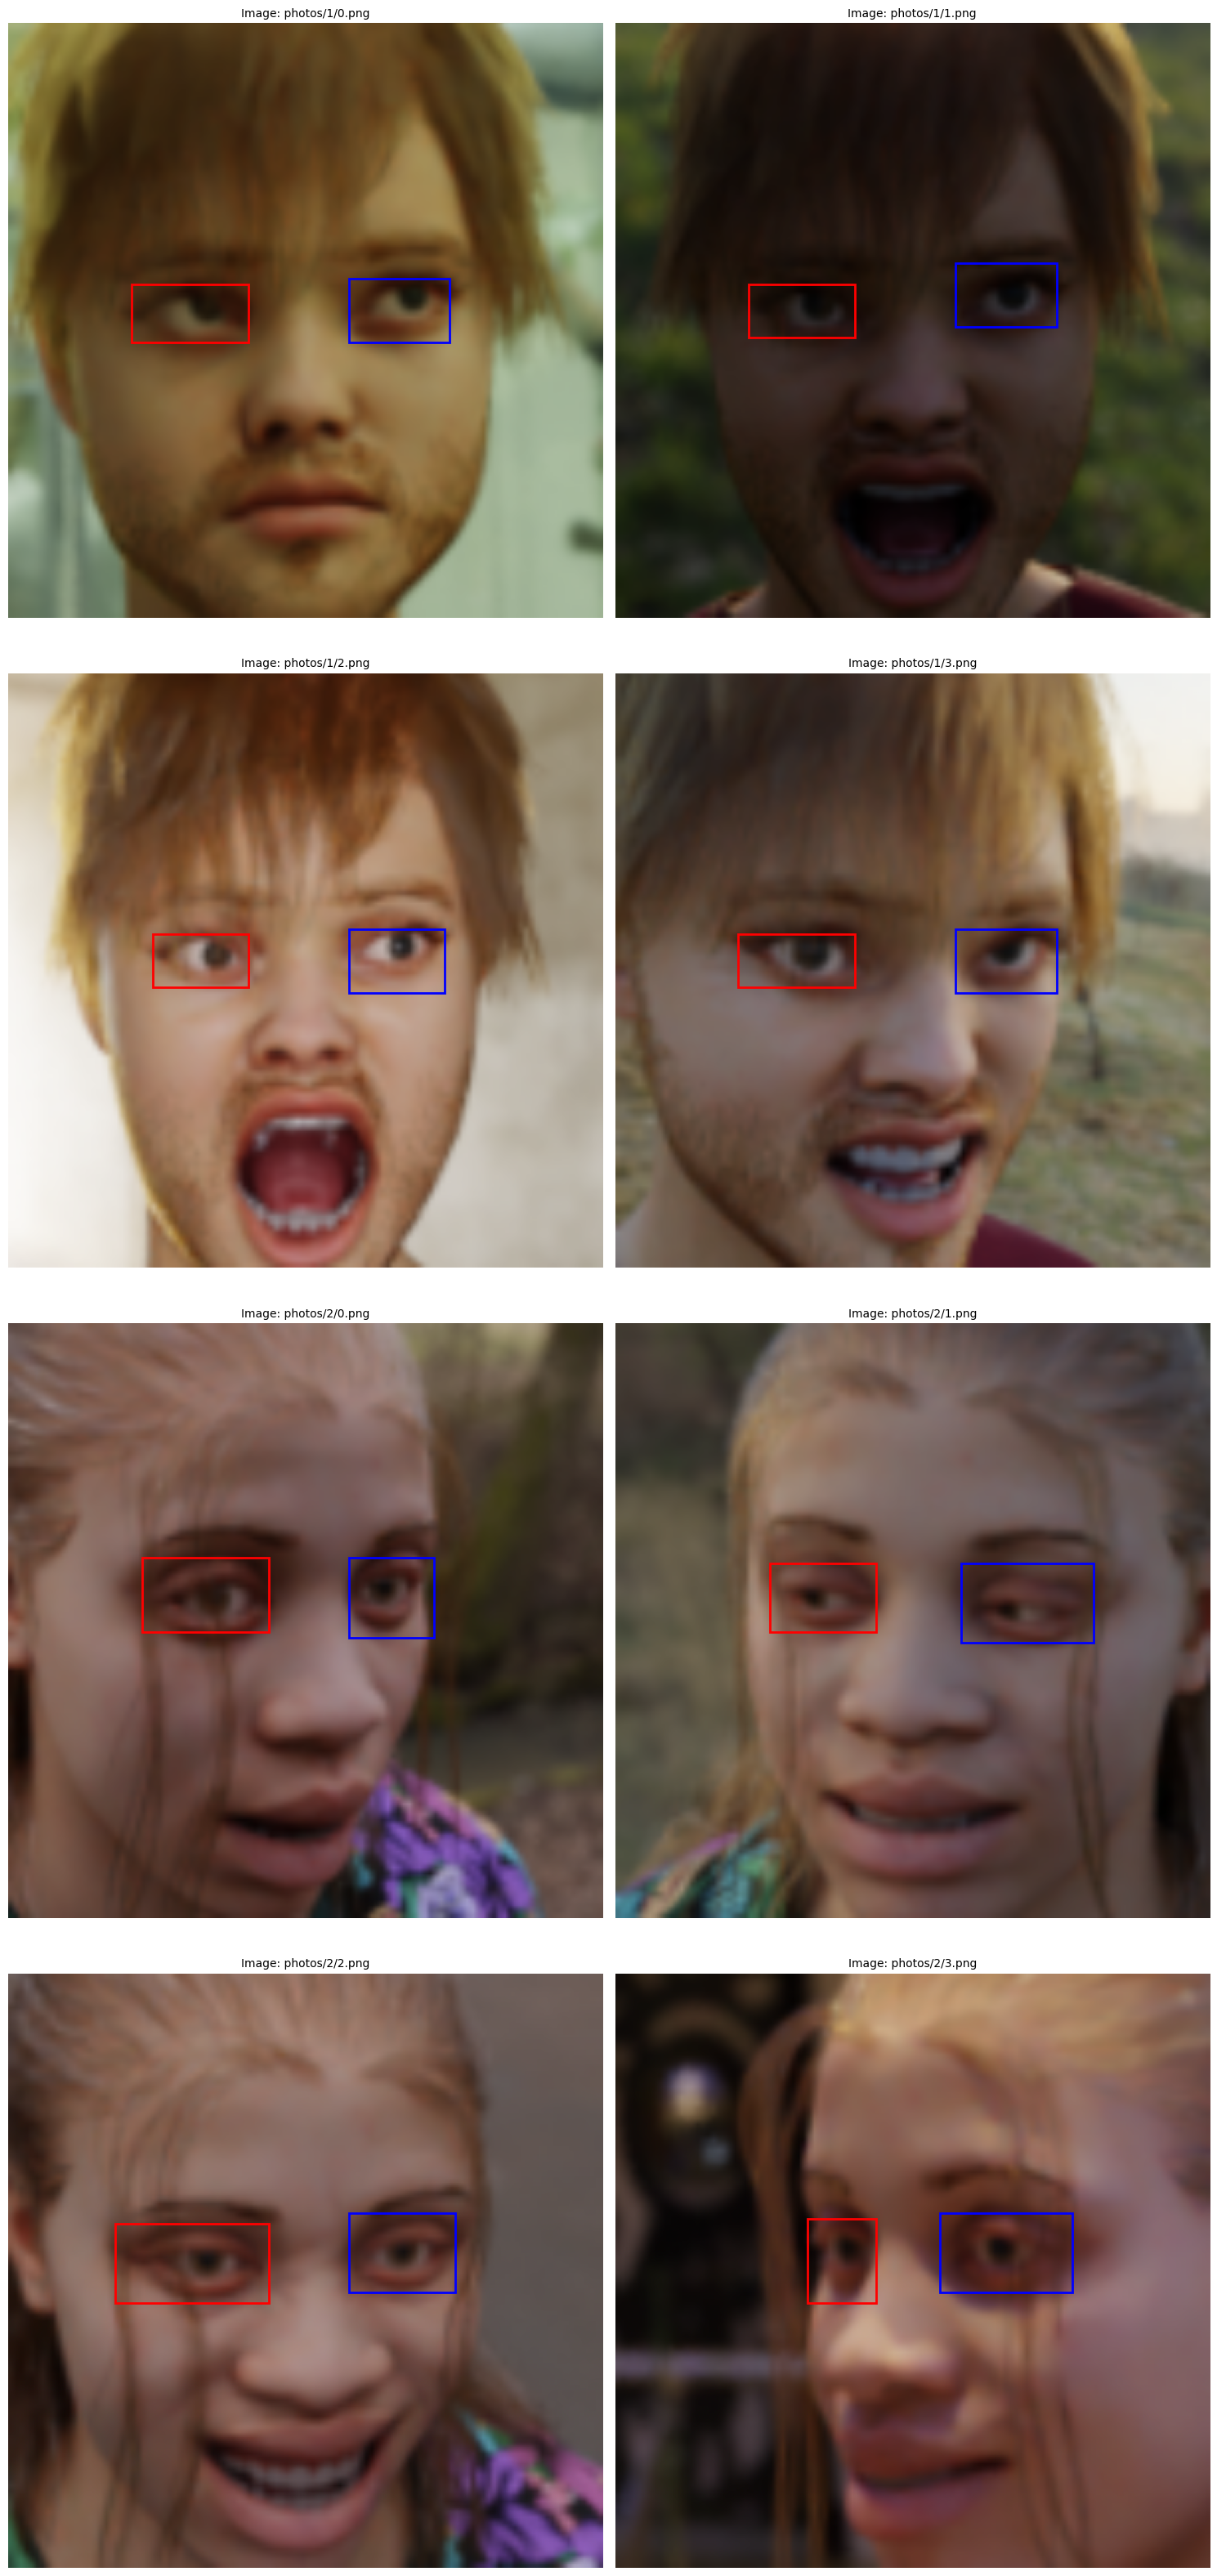

🎉 Successfully created visualization of eye detection dataset!


In [27]:
def visualize_multiple_images(image_paths, df, num_images=4):
    """Visualize multiple images with their eye bounding boxes"""
    
    # Limit to available images
    num_images = min(num_images, len(image_paths))
    
    # Create subplot grid
    cols = 2
    rows = (num_images + 1) // 2
    fig, axes = plt.subplots(rows, cols, figsize=(15, 8 * rows))
    
    if rows == 1:
        axes = [axes] if num_images == 1 else axes
    else:
        axes = axes.flatten()
    
    for i in range(num_images):
        if i >= len(existing_files):
            break
            
        img_path = existing_files[i]
        
        # Load and process image
        image_raw = tf.io.read_file(img_path)
        if img_path.endswith('.png'):
            image = tf.image.decode_png(image_raw, channels=3)
        else:
            image = tf.image.decode_jpeg(image_raw, channels=3)
        
        original_height, original_width = image.shape[:2]
        display_size = 300
        image_resized = tf.image.resize(image, [display_size, display_size])
        image_normalized = tf.cast(image_resized, tf.float32) / 255.0
        
        # Get coordinates
        idx = image_paths.index(img_path)
        coords = df.iloc[idx][["lx", "ly", "lw", "lh", "rx", "ry", "rw", "rh"]].values
        
        # Scale coordinates
        scale_x = display_size / original_width
        scale_y = display_size / original_height
        scaled_coords = coords * [scale_x, scale_y, scale_x, scale_y, scale_x, scale_y, scale_x, scale_y]
        
        # Plot
        ax = axes[i] if num_images > 1 else axes
        ax.imshow(image_normalized.numpy())
        ax.set_title(f"Image: {img_path}", fontsize=10)
        
        # Add rectangles
        left_rect = plt.Rectangle(
            (scaled_coords[0], scaled_coords[1]), scaled_coords[2], scaled_coords[3],
            edgecolor='red', facecolor='none', linewidth=2
        )
        right_rect = plt.Rectangle(
            (scaled_coords[4], scaled_coords[5]), scaled_coords[6], scaled_coords[7],
            edgecolor='blue', facecolor='none', linewidth=2
        )
        
        ax.add_patch(left_rect)
        ax.add_patch(right_rect)
        ax.axis('off')
    
    # Hide empty subplots
    for i in range(num_images, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize the first 4 images
visualize_multiple_images(image_paths, df, num_images=8)

print("🎉 Successfully created visualization of eye detection dataset!")